# FM85 Sketch

Here we use the FM85 sketch with $m=256=2^8$ and 30 independent runs...

In [104]:
import numpy as np
from fm85 import FM85 
runs = 30
results = []
avgs = []
fm85 = FM85(256)
testvalues = np.unique(np.logspace(1, 6, num=200, dtype=int))
for i in testvalues:
    avgs.append(0)
for run in range(0,runs+1):
    fm85.resetBits()
    results.append([])
    counter = 0
    for i in range(1,1000001): 
        fm85.add("item"+str(i)+str(run))
        if i in testvalues:
            res = fm85.query()
            avgs[counter] += ((res-i) / i * 100)
            # print(str(i) + "\t" + str(res))
            results[run].append(res)
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs

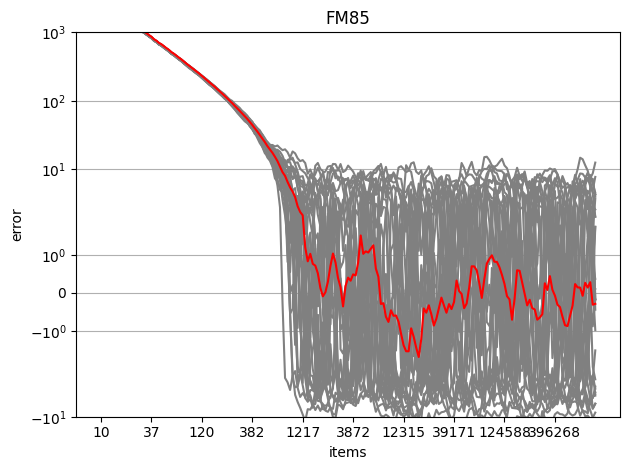

In [105]:
import matplotlib.pyplot as plt
for i, row in enumerate(results):
    percent_diff = ((row - testvalues) / testvalues * 100)
    plt.plot(percent_diff, color='grey') #, label=f'Row {i+1}')
plt.plot(avgs, color='red')    
step = 20
ticks = np.arange(0, len(testvalues), step)
plt.xticks(ticks=ticks, labels=[testvalues[i] for i in ticks])    
#plt.xticks(ticks=range(len(testvalues)), labels=testvalues)
plt.xlabel('items')
plt.yscale('symlog')
plt.ylim(-10, 1000)
#plt.xlim(400,100000)
plt.ylabel('error')
plt.title('FM85')
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()

We can se that FM85 performs bad for small cardinalities since most of the registers are empty in the beginning. Only after we have enough registers with valid data, the algorithm works as expected.

We can now try the same with the HyperLogLog algorithm, that corrects for small cardinalities:

# HyperLogLog

In [102]:
import numpy as np
from hll import HLL 
runs = 30
results = []
avgs = []
hll = HLL(256)
testvalues = np.unique(np.logspace(1, 6, num=200, dtype=int))
for i in testvalues:
    avgs.append(0)
for run in range(0,runs+1):
    hll.resetBits()
    results.append([])
    counter = 0
    for i in range(1,1000001): 
        hll.add("item"+str(i)+str(run))
        if i in testvalues:
            res = hll.query()
            avgs[counter] += ((res-i) / i * 100)
            # print(str(i) + "\t" + str(res))
            results[run].append(res)
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs

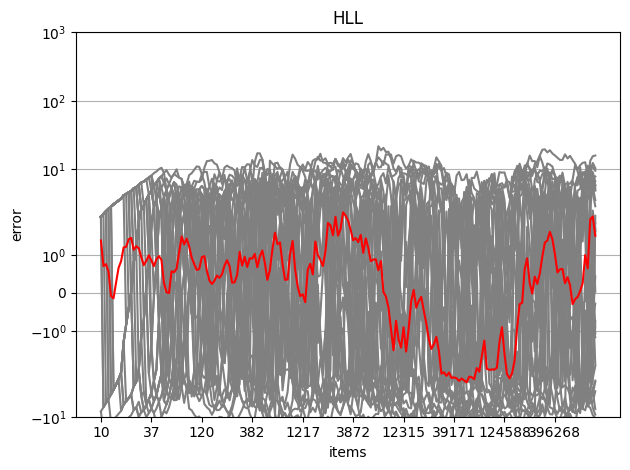

In [103]:
import matplotlib.pyplot as plt
for i, row in enumerate(results):
    percent_diff = ((row - testvalues) / testvalues * 100)
    plt.plot(percent_diff, color='grey') #, label=f'Row {i+1}')
plt.plot(avgs, color='red')    
step = 20
ticks = np.arange(0, len(testvalues), step)
plt.xticks(ticks=ticks, labels=[testvalues[i] for i in ticks])    
#plt.xticks(ticks=range(len(testvalues)), labels=testvalues)
plt.xlabel('items')
plt.yscale('symlog')
plt.ylim(-10, 1000)
plt.ylabel('error')
plt.title('HLL')
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()

In [98]:
import numpy as np
from hll import HLL 
#%load_ext autoreload
#%autoreload 2
runs = 20
results = []
avgs = []
hll = HLL(16384)
testvalues = np.unique(np.logspace(0, 5, num=200, dtype=int))
for i in testvalues:
    avgs.append(0)
for run in range(0,runs+1):
    hll.resetBits()
    results.append([])
    counter = 0
    for i in range(1,100001): 
        hll.add("item"+str(i)+str(run))
        if i in testvalues:
            res = hll.query()
            avgs[counter] += ((res-i) / i * 100)
            results[run].append(res)
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs

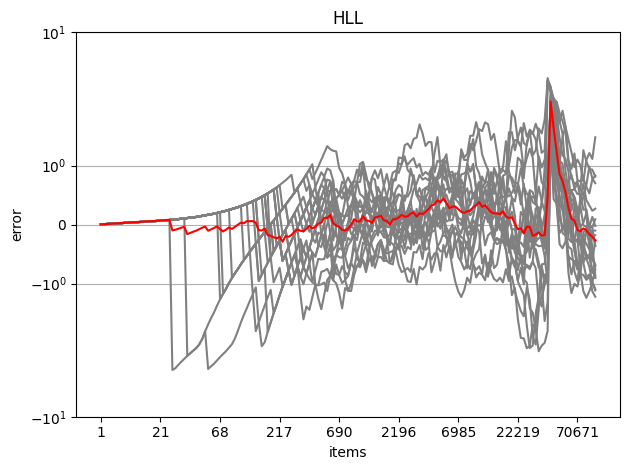

In [99]:
import matplotlib.pyplot as plt
for i, row in enumerate(results):
    percent_diff = ((row - testvalues) / testvalues * 100)
    plt.plot(percent_diff, color='grey') #, label=f'Row {i+1}')
plt.plot(avgs, color='red')    
step = 20
ticks = np.arange(0, len(testvalues), step)
plt.xticks(ticks=ticks, labels=[testvalues[i] for i in ticks])    
#plt.xticks(ticks=range(len(testvalues)), labels=testvalues)
plt.xlabel('items')
plt.yscale('symlog')
plt.ylim(-10, 10)
#plt.xlim(400,100000)
plt.ylabel('error')
plt.title('HLL')
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()
#plt.savefig('hll_16380.pdf', dpi=300)
#plt.close()

With $m=2^{14}$, we can see a spike exactly at the transistion between linear counting and the harmonic mean calculation at $\frac{2}{5}2^{14}$.

We can now see how LLBeta will handle this situation and if the spike vanishes.

In [2]:
import numpy as np
from llBeta import LLBeta 
#%load_ext autoreload
#%autoreload 2
runs = 20
results = []
avgs = []
llBeta = LLBeta(16384)
testvalues = np.unique(np.logspace(0, 5, num=200, dtype=int))
for i in testvalues:
    avgs.append(0)
for run in range(0,runs+1):
    llBeta.resetBits()
    results.append([])
    counter = 0
    for i in range(1,100001): 
        llBeta.add("item"+str(i)+str(run))
        if i in testvalues:
            res = llBeta.query()
            avgs[counter] += ((res-i) / i * 100)
            results[run].append(res)
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs

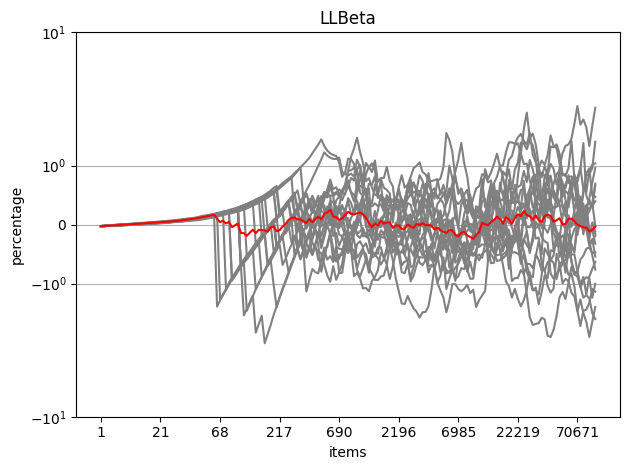

In [26]:
import matplotlib.pyplot as plt
for i, row in enumerate(results):
    percent_diff = ((row - testvalues) / testvalues * 100)
    plt.plot(percent_diff, color='grey') #, label=f'Row {i+1}')
plt.plot(avgs, color='red')    
step = 20
ticks = np.arange(0, len(testvalues), step)
plt.xticks(ticks=ticks, labels=[testvalues[i] for i in ticks])    
#plt.xticks(ticks=range(len(testvalues)), labels=testvalues)
plt.xlabel('items')
plt.yscale('symlog')
plt.ylim(-10, 10)
#plt.xlim(400,100000)
plt.ylabel('percentage')
plt.title('LLBeta')
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()
#plt.savefig('llbeta_16380.pdf', dpi=300)
#plt.close()

With HLLBeta the spike has vanished and the bias is centered for all cardinalities.

## The Tail of the Registers

The HLL-Tailcut algorithm uses the fact, that only few registers are filled with high
values. We can visualize the registers and their values in a histogram to show the
tailed distribution and why it might be interesting to cut the right side.

25


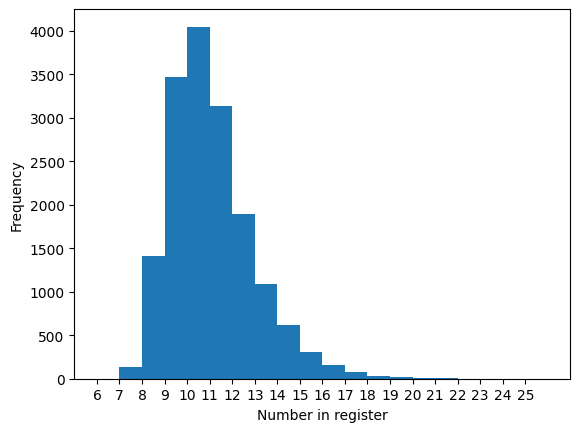

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from llBeta import LLBeta 
#%load_ext autoreload
#%autoreload 2
llBeta = LLBeta(2**14)
llBeta.resetBits()
counter = 0
for i in range(1,10000001): 
    llBeta.add("item"+str(i))
values = llBeta.bits
min_val, max_val = min(values), max(values)
print(max_val)
bins = np.arange(min_val, max_val + 2)
plt.hist(values, bins=bins)  
plt.xticks(np.arange(min_val, max_val + 1))
plt.xlabel('Number in register')
plt.ylabel('Frequency')
#plt.yscale('symlog')
#plt.title('Histogram')
fig = plt.gcf()
#fig.set_size_inches(10,5, True)
plt.savefig('llbeta_histogram.pdf', dpi=300)
#plt.show()

The registers have values between 6 and 28 for 10 Million items and $m=2^{14}$. If we would cut the registers at $2^4=16$, we would only loose registers at the far right, that do not contribute much to the average calculation, but at the same time, we would only need 4 Bytes of memory per register.

## Extended HyperHyperLog


In [73]:
from ehll import EHLL
from hll import HLL
import matplotlib.pyplot as plt
import numpy as np
#%load_ext autoreload
#%autoreload 2
runs = 30
avgs = []
avgs2 = []
ehll = EHLL(2**8)
hll = HLL(int(2**8))
#testvalues = np.unique(np.logspace(0, 5, num=200, dtype=int))
testvalues = np.unique(range(100,1000001,1000))
for i in testvalues:
    avgs.append(0)
    avgs2.append(0)
for run in range(0,runs+1):
    ehll.resetBits()
    hll.resetBits()
    counter = 0
    for i in range(100,1000001): 
        ehll.add("item"+str(i)+str(run))
        hll.add("item"+str(i)+str(run))
        if i in testvalues :
            res = ehll.query()
            res2 = hll.query()
            avgs[counter] += ((res-i) / i ) ** 2
            avgs2[counter] += ((res2-i) / i ) ** 2
            counter += 1
for i, val in enumerate(avgs):
    avgs[i] = val / runs
for i, val in enumerate(avgs2):
    avgs2[i] = val / runs

0.0037111770377954694
0.004634550849008389


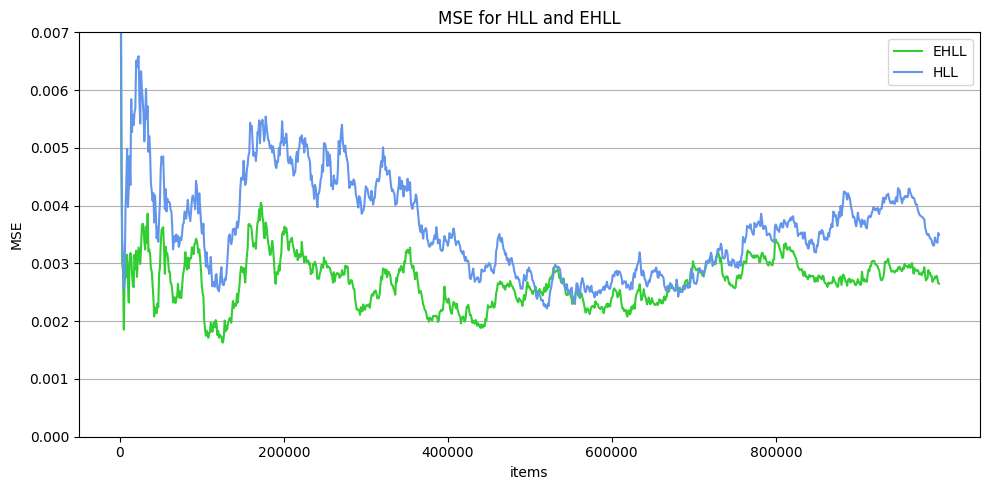

In [81]:
import matplotlib.pyplot as plt
import statistics
plt.plot(avgs, color='limegreen')    
plt.plot(avgs2, color='cornflowerblue')  
print(statistics.mean(avgs))
print(statistics.mean(avgs2))
step = 200
ticks = np.arange(0, len(testvalues), step)
plt.xticks(ticks=ticks, labels=[0,200000, 400000, 600000, 800000]) #[testvalues[i] for i in ticks])    
#plt.xticks(ticks=range(len(testvalues)), labels=testvalues)
plt.xlabel('items')
#plt.yscale('symlog')
plt.ylim(0.00, 0.007)
#plt.xlim(400,100000)
plt.ylabel('MSE')
plt.title('MSE for HLL and EHLL')
plt.grid(True, which='both', axis='y')
plt.legend(['EHLL','HLL'])
fig = plt.gcf()
fig.set_size_inches(10,5, True)
plt.tight_layout()
#plt.savefig('mse.pdf', dpi=300)
plt.show()

In [60]:
import math
0.8 * 1.04 / math.sqrt(int(7/6 * 2**8))

0.04819646593744256

In [61]:
0.041 / math.sqrt(2**8) / 0.8

0.003203125